# Week 7 Project Deadline
**Data I/O and 2+ Functions**

## get_column_names

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "panthera_col.csv", I used the following Unix command

tail -n +18 panthera_col.csv > formatted_panthera_col.csv

This function takes in a file and returns the names of all its columns with appropriate indeces

In [99]:
def get_column_names(filename):
    in_file = open(filename) #opens the inputted file
    column_names = {} #create an empty dictionary to populate with the column number as the key and the name of the column as the value
    first_line = in_file.readline() #read in the first line, with only the column names
    column_name_keys = first_line.split('","') #take the column names and split them by '","' to create a list
    num_columns = len(column_name_keys) #get the total number of columns
    for column in range(0, num_columns): #make a for loop that iterates from zero to the num_columns
        column_names[column] = column_name_keys[column]
    in_file.close()
    return column_names

In [100]:
get_column_names("formatted_panthera_col.csv")

{0: '"collection_no',
 1: 'record_type',
 2: 'formation',
 3: 'lng',
 4: 'lat',
 5: 'collection_name',
 6: 'collection_subset',
 7: 'collection_aka',
 8: 'n_occs',
 9: 'early_interval',
 10: 'late_interval',
 11: 'max_ma',
 12: 'min_ma',
 13: 'reference_no"\n'}

## column_extractor

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "panthera_col.csv", I used the following Unix command

tail -n +18 panthera_col.csv > formatted_panthera_col.csv


This function will take any two columns and group them together in a dictionary. The keys can be used to identify and match up different values that can be plotted against each other


In [101]:
def column_extractor(file_name, key_column, value_column):
    file_input = open(file_name) #opens the inputted file
    file_input.readline()
    extract_dict = {} #empty dictionary
    for line in file_input:
        y = line.split('","')[key_column] #key column is the y value
        x = line.split('","')[value_column] #value column is the x value
        extract_dict[y] = x #populate dictionary
    in_file.close() 
    return extract_dict

In [102]:
column_extractor("formatted_panthera_col.csv",0, 9)

{'"101897': 'Late Pleistocene',
 '"101899': 'Late Pleistocene',
 '"104033': 'Holocene',
 '"104680': 'Late Pleistocene',
 '"109703': 'Late Pleistocene',
 '"115184': 'Late Pleistocene',
 '"115191': 'Pleistocene',
 '"11803': 'Late Pleistocene',
 '"120834': 'Middle Pleistocene',
 '"13066': 'Pleistocene',
 '"13293': 'Middle Pleistocene',
 '"133644': 'Pleistocene',
 '"13456': 'Late Pleistocene',
 '"136498': 'Late Pleistocene',
 '"13738': 'Holocene',
 '"141367': 'Late Pleistocene',
 '"144976': 'Late Pleistocene',
 '"145508': 'Pleistocene',
 '"147609': 'Pleistocene',
 '"147815': 'Pleistocene',
 '"152009': 'Rancholabrean',
 '"152265': 'Late Miocene',
 '"152266': 'Late Miocene',
 '"152267': 'Late Miocene',
 '"154722': 'Late Pleistocene',
 '"154771': 'Late Pleistocene',
 '"154804': 'Late Pleistocene',
 '"154805': 'Late Pleistocene',
 '"155393': 'Late Pleistocene',
 '"161194': 'Pleistocene',
 '"183123': 'Pleistocene',
 '"183152': 'Early Pleistocene',
 '"20166': 'Irvingtonian',
 '"20283': 'Irvingto

## stratify
**Must supply a dictionary of items "to stratify" and a "dictionary" to stratify over**

**Both dictionaries must have matching keys**

To supply dictionary items to stratify over (species, time interval, etc.) *For this particular example, I have used time interval in which a fossil shows up as the dictionary to stratify over from the file "formatted_panthera_col.csv"*

This function takes two dictionaries as arguments. The first one, "to_stratify" provides as its values all the possible items to stratify over. The other dictionary "dictionary"'s values are stratified over the unique list created from to_stratify. The function returns a list of the values from "dictionary" as dictionaries separated by the to_stratify values 




In [103]:
def stratify(to_stratify, dictionary):   
    stratify_list = list(to_stratify.values())
    stratify = [] #empty list to hold unique values of items to stratify over
    list_of_dicts = [] #empty list to hold stratified dictionaries
    #for loop to create unique list of items to stratify over
    for item in stratify_list:
        if item not in stratify:
            stratify.append(item)
    #for loop to create a dictionary per item in stratify
    for item in stratify:
        new_dict = {}
        #iterate through all items to stratify them into different dictionaries
        for key in to_stratify.keys():
            if to_stratify[key] == item:
                new_dict[key] = dictionary[key] #populate new_dict only if correct dictionary
        list_of_dicts.append(new_dict) #add each item that satisfies the category to the new dictionary
    return list_of_dicts

In [104]:
interval = column_extractor("formatted_panthera_col.csv", 0, 9)
longitude = column_extractor("formatted_panthera_col.csv", 0, 3)
stratify(interval, longitude)

[{'"21442': '36.275002',
  '"21451': '36.242001',
  '"21755': '36.166698',
  '"21791': '27.733299',
  '"21821': '27.733601',
  '"21826': '27.720800',
  '"21827': '27.720800',
  '"22329': '27.750000',
  '"22331': '27.450001',
  '"22332': '27.750000',
  '"22334': '27.750000',
  '"22355': '28.950001',
  '"22356': '28.950001',
  '"22357': '28.950001',
  '"32050': '35.130001',
  '"58809': '23.033333'},
 {'"20166': '-100.477097',
  '"20283': '-102.300003',
  '"20285': '-103.199997',
  '"20286': '-79.300003',
  '"20289': '-82.070274',
  '"20290': '-93.199997',
  '"20295': '-100.300003',
  '"20302': '-78.699997',
  '"20307': '-118.500000',
  '"20335': '-117.000000',
  '"20347': '-102.500000',
  '"20354': '-77.199997',
  '"20415': '-82.599998',
  '"20479': '-75.300003',
  '"20499': '-117.500000',
  '"20520': '-82.599998',
  '"20533': '-99.800003'},
 {'"104033': '-79.740280',
  '"13738': '116.150002',
  '"21687': '-60.000000',
  '"21689': '-71.366699',
  '"21690': '35.000000',
  '"21691': '-79.8

## map_plotter
**Must supply two dictionaries with matching keys**

The function takes in two dictionaries with matching keys and plots both dictionaries' values as a scatterplot, and returns it

In [105]:
def map_plotter(x_dict, y_dict):
    lattitude = [] #empty list for lattitudes
    longitude = [] #empty list for longitudes
    
    #extract the values from x_dict into a list so it is plottable
    x_list = list(x_dict.keys()) #make a list of all the keys
    for item in x_list:
        longitude.append(float(x_dict[item])) #make sure value is a float
    
    #do the same for lattitude
    y_list = list(y_dict.keys()) 
    for item in y_list:
        lattitude.append(float(y_dict[item]))
    
    import matplotlib.pyplot as plt
    
    #plot and return
    plt.plot(longitude, lattitude, 'bo')
    return plt.show()

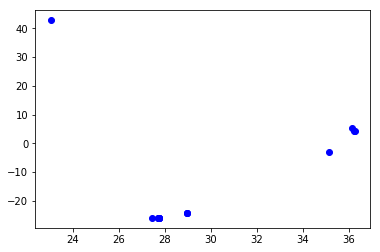

In [106]:
interval = column_extractor("formatted_panthera_col.csv", 0, 9)
longitude = column_extractor("formatted_panthera_col.csv", 0, 3)
lattitude = column_extractor("formatted_panthera_col.csv", 0, 4)
strat_lng = stratify(interval, longitude)
strat_lat = stratify(interval, lattitude)
x1 = strat_lng[0]
y1 = strat_lat[0]
map_plotter(x1, y1)